In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


2.637862 is derived from the lowest value after log transform.
Data is small enough to see by examination there are no missing values

In [2]:

data_df = pd.read_csv("PUPCYCLE_statistics_edit.csv")

data_df['chl a large cells (ug/L)'] = np.log(data_df['chl a large cells (ug/L)']) + 2.637862
data_df['chl a small cells (ug/L)'] = np.log(data_df['chl a small cells (ug/L)']) + 2.637862

C:\Users\sujin\miniconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sujin\miniconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3]:
Group_Wide = data_df[data_df["Shelf Type"] == "Wide"]
Group_Narrow = data_df[data_df["Shelf Type"] == "Narrow"]

In [4]:
#Do 5-point summary instead of just display dataframe
Group_Narrow

,Time Point,Shelf Type,Treatment,Sample Name,NO3 (uM),PO4 (uM),SiO2 (uM),chl a large cells (ug/L),chl a small cells (ug/L),Absolute NO3 Uptake (?NO3) large cells (umol/L/day),Absolute NO3 Uptake (?NO3) small cells (umol/L/day),Biomass-normalized NO3 Uptake (VNO3) large cells (per day),Biomass-normalized NO3 Uptake (VNO3) small cells (per day),Absolute DIC Uptake (?DIC) large cells (umol/L/day),Absolute DIC Uptake (?DIC) small cells (umol/L/day),Biomass-normalized DIC Uptake (VDIC) large cells (per day),Biomass-normalized DIC Uptake (VDIC) small cells (per day)
21,T0,Narrow,DW,Q50,11.70,1.360,14.34,1.035350,8.373967e-01,0.063993,0.028953,0.247188,0.080634,0.418043,0.198644,0.3393,0.0945
22,T0,Narrow,DW,Q51,14.50,1.470,18.69,1.602517,7.738662e-02,0.045623,0.050205,0.196842,0.114229,0.272012,0.345079,0.2169,0.1572
23,T0,Narrow,DW,Q52,11.80,1.630,14.47,1.632166,-4.425351e-08,0.053528,0.026735,0.141384,0.061455,0.324455,0.134673,0.2780,0.0963
24,T1,Narrow,Ctrl,Q53,14.90,1.770,19.32,3.252777,7.915872e-01,1.126471,0.147898,0.857472,0.280426,9.887272,0.752372,1.3116,0.3329
25,T1,Narrow,Ctrl,Q54,9.09,1.400,10.56,2.688707,7.102416e-01,0.528622,0.132845,0.500443,0.219888,6.641014,1.015718,1.1294,0.4304
26,T1,Narrow,Ctrl,Q55,14.60,1.710,18.71,3.114792,5.579724e-01,0.735973,0.184306,0.785485,0.368038,5.693945,0.960823,1.1159,0.4147
27,T1,Narrow,Fe,Q56,14.40,1.530,17.65,3.193263,4.092892e-01,1.322825,0.148412,0.840335,0.283709,12.056023,0.749946,1.2928,0.3383
28,T1,Narrow,Fe,Q57,12.30,1.410,15.85,2.840623,6.278420e-01,0.815669,0.123876,0.651645,0.256789,7.794321,0.671599,1.2022,0.3217
29,T1,Narrow,Fe,Q58,17.70,1.950,24.47,3.188535,7.380985e-01,1.100390,0.222208,0.900757,0.391280,8.141741,1.214288,1.0773,0.2301
30,T1,Narrow,DFB,Q59,9.93,1.480,11.44,2.711874,7.915872e-01,0.235998,0.077663,0.334622,0.188644,2.767078,0.447241,0.7835,0.3199


In [5]:
#2.A
#find variance of each group

print("Wide Shelf Large Cell Var:")
print(np.var(Group_Wide["chl a large cells (ug/L)"]))

print("Narrow Shelf Large Cell Var:")
print(np.var(Group_Narrow["chl a large cells (ug/L)"]))

print("Ratio:")
print(np.var(Group_Narrow["chl a large cells (ug/L)"])/np.var(Group_Wide["chl a large cells (ug/L)"]))


Wide Shelf Large Cell Var:
2.039740395314855
Narrow Shelf Large Cell Var:
1.353785504858571
Ratio:
0.6637048067333098


In [6]:
#perform two sample t-test with equal variances
stats.ttest_ind(a=Group_Narrow["chl a large cells (ug/L)"], b=Group_Wide["chl a large cells (ug/L)"], equal_var=False)

Ttest_indResult(statistic=7.73383443137811, pvalue=2.373144209686931e-09)

T-Statistic: 7.73383443137811

P-Value: 0.000000002373144209686931

0.000000002373144209686931e is not greater than 0.05

We have sufficient evidence to say the two groups are different


In [7]:
#find variance of each group

print("Wide Shelf SmallCell Var:")
print(np.var(Group_Wide["chl a small cells (ug/L)"]))

print("Narrow Shelf Small Cell Var:")
print(np.var(Group_Narrow["chl a small cells (ug/L)"]))

print("Ratio:")
print(np.var(Group_Narrow["chl a small cells (ug/L)"])/np.var(Group_Wide["chl a small cells (ug/L)"]))


Wide Shelf SmallCell Var:
0.7835963619078916
Narrow Shelf Small Cell Var:
nan
Ratio:
nan


In [8]:
#perform two sample t-test with equal variances
stats.ttest_ind(a=Group_Narrow["chl a small cells (ug/L)"], b=Group_Wide["chl a small cells (ug/L)"], equal_var=True)

C:\Users\sujin\miniconda3\lib\site-packages\numpy\core\_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Ttest_indResult(statistic=nan, pvalue=nan)

Reshape data to add new variable: Cell Size(Large/Small) and just 1 col for Chl values.
Should double row count.

Add interactions as factors(not continuious)

T0 does not have treatments, take it out of Anova

Plot out Anova: Mean, CIs, etc 
X: timepoint, y: shelf types(2 curves) and show 95% CI
Show for each interaction

Plot out residauals

Find CI and mean for each cell

Make sure data is fit for Anova(Too imblanaced?)

Check Distribution of Chl with overlapping density graph(overlap in size)



In [9]:
#2.B
#4-Way Anova (Shelf by time by treatment by cell size)

Anova_data_df = data_df[["Shelf Type", "Time Point", "Treatment", "chl a large cells (ug/L)"]]
Anova_data_df = Anova_data_df.rename(columns={"Shelf Type": "Shelf_Type", "Time Point": "Time_Point", "chl a large cells (ug/L)" : "Biomass"})

model = ols('Biomass ~ C(Shelf_Type) + C(Time_Point) + C(Treatment)', data= Anova_data_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Shelf_Type),106.561472,1.0,348.894071,4.151722e-20
C(Time_Point),108.207469,2.0,177.141624,2.336720e-19
C(Treatment),10.665703,3.0,11.640231,1.762017e-05
Residual,10.995352,36.0,NaN,NaN


In [10]:
#2.C
#T0 Only 2-Sample T-Test
T0_data_df = data_df[data_df["Time Point"] == "T0"]
Group_Wide = T0_data_df[T0_data_df["Shelf Type"] == "Wide"]
Group_Narrow = T0_data_df[T0_data_df["Shelf Type"] == "Narrow"]

#find variance of each group

print("Wide Shelf Large Cell Var:")
print(np.var(Group_Wide['chl a large cells (ug/L)']))

print("Narrow Shelf Large Cell Var:")
print(np.var(Group_Narrow['chl a large cells (ug/L)']))

print("Ratio:")
print(np.var(Group_Narrow['chl a large cells (ug/L)'])/np.var(Group_Wide['chl a large cells (ug/L)']))


Wide Shelf Large Cell Var:
0.05704867431356533
Narrow Shelf Large Cell Var:
0.07541636696926866
Ratio:
1.3219652844997973


In [11]:
#perform two sample t-test with equal variances
stats.ttest_ind(a=Group_Narrow['chl a large cells (ug/L)'], b=Group_Wide['chl a large cells (ug/L)'], equal_var=True)

Ttest_indResult(statistic=10.826526005002133, pvalue=0.0004129418093933404)

T-Statistic: 10.826526005002133

P-Value: 0.0004129418093933404

0.0004129418093933404 is not greater than 0.05

We have sufficient evidence to say the two groups are different


In [12]:
#3: ANOVA but for uptake and Nutrient concentration 


Anova_data_df = data_df
Anova_data_df.columns = ["Time_Point", "Shelf_Type", "Treatment", "Sample_N",
                                        "NO3", "PO4", "SiO2", "Biomass_L", "Biomass_S",
                                        "A_NO3_Uptake_L", "A_NO3_Uptake_S", "N_NO3_Uptake_L", "N_NO3_Uptake_S",
                                        "A_DIC_Uptake_L", "A_DIC_Uptake_S", "N_DIC_Uptake_L", "N_DIC_Uptake_S"]

In [13]:
Uptake = ["A_NO3_Uptake_L", "A_NO3_Uptake_S", "N_NO3_Uptake_L", "N_NO3_Uptake_S",
          "A_DIC_Uptake_L", "A_DIC_Uptake_S", "N_DIC_Uptake_L", "N_DIC_Uptake_S"]

for y in Uptake:
    print(y)
    model = ols(y + '~ C(Shelf_Type) + C(Time_Point) + C(Treatment)', data= Anova_data_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    display(anova_table)

A_NO3_Uptake_L


,sum_sq,df,F,PR(>F)
C(Shelf_Type),33.909175,1.0,14.197950,0.000590
C(Time_Point),47.840838,2.0,10.015605,0.000348
C(Treatment),19.230810,3.0,2.684014,0.061137
Residual,85.979337,36.0,NaN,NaN


A_NO3_Uptake_S


,sum_sq,df,F,PR(>F)
C(Shelf_Type),0.548841,1.0,14.972603,0.000440
C(Time_Point),0.829380,2.0,11.312905,0.000154
C(Treatment),0.060118,3.0,0.546683,0.653571
Residual,1.319630,36.0,NaN,NaN


N_NO3_Uptake_L


,sum_sq,df,F,PR(>F)
C(Shelf_Type),0.477826,1.0,21.341201,4.773745e-05
C(Time_Point),1.415718,2.0,31.615156,1.185350e-08
C(Treatment),0.486787,3.0,7.247138,6.329865e-04
Residual,0.806035,36.0,NaN,NaN


N_NO3_Uptake_S


,sum_sq,df,F,PR(>F)
C(Shelf_Type),0.160940,1.0,30.968395,2.652137e-06
C(Time_Point),0.244083,2.0,23.483461,2.972730e-07
C(Treatment),0.009846,3.0,0.631536,5.994623e-01
Residual,0.187089,36.0,NaN,NaN


A_DIC_Uptake_L


,sum_sq,df,F,PR(>F)
C(Shelf_Type),12217.924865,1.0,14.762508,0.000477
C(Time_Point),20504.645503,2.0,12.387537,0.000081
C(Treatment),6300.132865,3.0,2.537413,0.071937
Residual,29794.753633,36.0,NaN,NaN


A_DIC_Uptake_S


,sum_sq,df,F,PR(>F)
C(Shelf_Type),118.553095,1.0,8.059009,0.007398
C(Time_Point),228.487528,2.0,7.766069,0.001571
C(Treatment),20.137325,3.0,0.456299,0.714489
Residual,529.582646,36.0,NaN,NaN


N_DIC_Uptake_L


,sum_sq,df,F,PR(>F)
C(Shelf_Type),3.275463,1.0,52.874430,1.450520e-08
C(Time_Point),10.210792,2.0,82.414276,3.652471e-14
C(Treatment),3.147705,3.0,16.937360,5.006785e-07
Residual,2.230126,36.0,NaN,NaN


N_DIC_Uptake_S


,sum_sq,df,F,PR(>F)
C(Shelf_Type),0.955740,1.0,40.633077,2.202281e-07
C(Time_Point),1.511631,2.0,32.133317,9.831714e-09
C(Treatment),0.095962,3.0,1.359939,2.705309e-01
Residual,0.846765,36.0,NaN,NaN


In [14]:
Nutrient = ["NO3", "PO4", "SiO2"]

for y in Nutrient:
    print(y)
    model = ols(y + '~ C(Shelf_Type) + C(Time_Point) + C(Treatment)', data= Anova_data_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    display(anova_table)

NO3


,sum_sq,df,F,PR(>F)
C(Shelf_Type),315.812593,1.0,44.286297,9.353973e-08
C(Time_Point),189.877012,2.0,13.313196,4.696907e-05
C(Treatment),113.709850,3.0,5.315165,3.890189e-03
Residual,256.721696,36.0,NaN,NaN


PO4


,sum_sq,df,F,PR(>F)
C(Shelf_Type),2.818956,1.0,45.117730,7.741267e-08
C(Time_Point),3.065011,2.0,24.527936,1.900061e-07
C(Treatment),1.465869,3.0,7.820467,3.809365e-04
Residual,2.249280,36.0,NaN,NaN


SiO2


,sum_sq,df,F,PR(>F)
C(Shelf_Type),704.135260,1.0,46.756622,5.362095e-08
C(Time_Point),317.823961,2.0,10.552216,2.473935e-04
C(Treatment),175.968781,3.0,3.894946,1.651795e-02
Residual,542.145007,36.0,NaN,NaN


Do centering and scaling for PCA features
Center and scale by columns (each variable has same impact) 

Diagnostic PCA plots (scree plot)
Shows how much variation in each principal component

Graph Treatment types as symbols

Put PCA in separate notebook

Add a lot more notes

In [15]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("PUPCYCLE_statistics_edit.csv")
df.columns = ["Time_Point", "Shelf_Type", "Treatment", "Sample_N",
                                        "NO3", "PO4", "SiO2", "Biomass_L", "Biomass_S",
                                        "A_NO3_Uptake_L", "A_NO3_Uptake_S", "N_NO3_Uptake_L", "N_NO3_Uptake_S",
                                        "A_DIC_Uptake_L", "A_DIC_Uptake_S", "N_DIC_Uptake_L", "N_DIC_Uptake_S"]


features = ["Biomass_L", "Biomass_S","A_NO3_Uptake_L", "A_NO3_Uptake_S", 
            "N_NO3_Uptake_L", "N_NO3_Uptake_S", "A_DIC_Uptake_L", "A_DIC_Uptake_S", 
            "N_DIC_Uptake_L", "N_DIC_Uptake_S"]

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['Shelf_Type']].values

x = StandardScaler().fit_transform(x)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

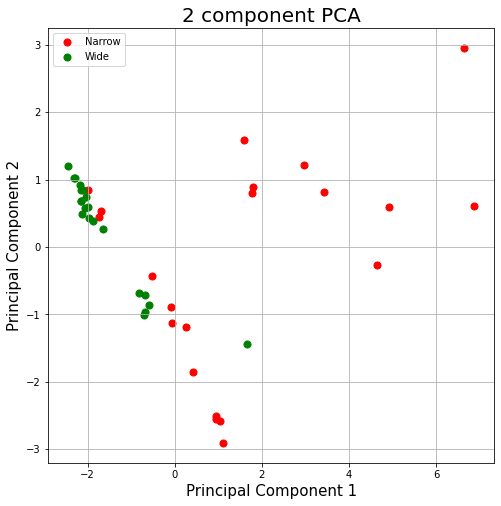

In [17]:
import matplotlib.pyplot as plt

finalDf = pd.concat([principalDf, df[['Shelf_Type']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Narrow', 'Wide']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Shelf_Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [18]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', "principal component 3"])

principalDf

,principal component 1,principal component 2,principal component 3
0,-2.313440,1.020913,-0.218884
1,-2.447115,1.206054,-0.257824
2,-1.996341,0.596224,0.080233
3,-2.144718,0.674623,-0.293119
4,-2.115572,0.846294,-0.232766
5,-1.642794,0.272694,0.033960
6,-2.120586,0.492406,-0.231055
7,-2.055568,0.578469,-0.137142
8,-1.874681,0.377385,-0.090076
9,-2.182510,0.914286,-0.163759


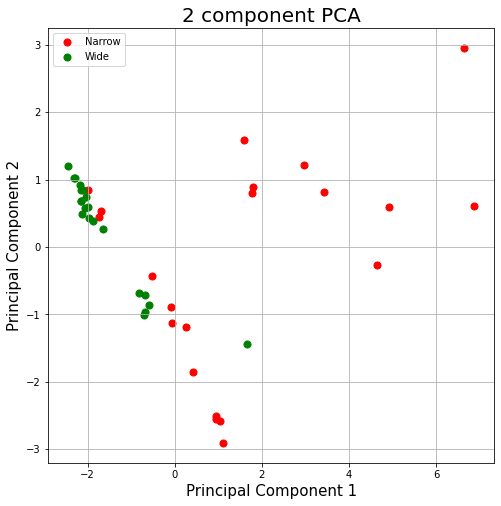

In [19]:
finalDf = pd.concat([principalDf, df[['Shelf_Type']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Narrow', 'Wide']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Shelf_Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

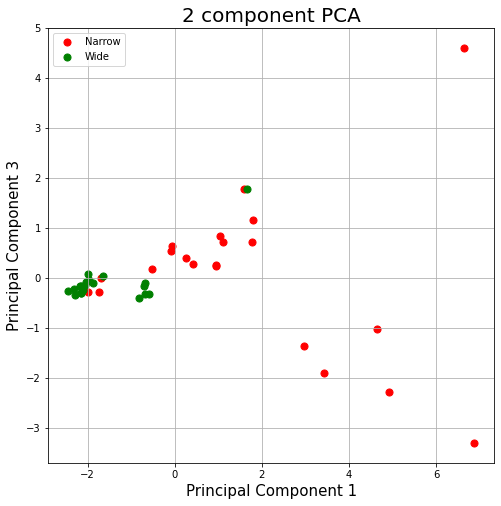

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Narrow', 'Wide']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Shelf_Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

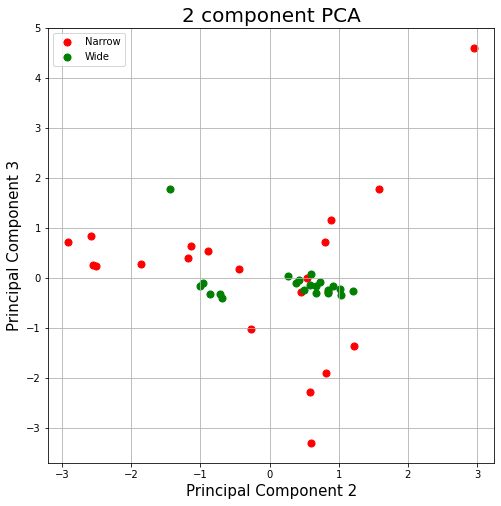

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Narrow', 'Wide']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Shelf_Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# 